In [ ]:
# "I certify that the code and data in this assignment were generated independently, 
# using only the tools and resources defined in the course and that I did not receive any external help, 
# coaching or contributions during the production of this work."

The notebook is exploring 2 gym environments and executed in google colab.

# Exploring OpenAI Gym Environments

## Explore 'CartPole-v1'

The environment is known as cart-pole problem. a pole is attached by a joint to a cart. The goal of the game is to maintain the pole upright by moving the cart.

In [4]:
# Import some necessary libaries
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1

In [5]:
!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1
!pip install gym[atari] > /dev/null 2>&1

     |████████████████████████████████| 1.1 MB 10.3 MB/s 
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [1]:
import gym
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) 
import tensorflow as tf
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML

from IPython import display as ipythondisplay

In [2]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

In [3]:
"""
Utility functions to enable video recording of gym environment and displaying it
To enable video, just do "env = wrap_env(env)""
"""

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    

def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env

In [6]:
env = wrap_env(gym.make("CartPole-v1"))

In [10]:
print(env.action_space)

Discrete(2)


In [11]:
observation = env.reset()

while True:
  
    env.render()
    
    #your agent goes here
    action = env.action_space.sample() 
         
    observation, reward, done, info = env.step(action) 
   
        
    if done: 
      break;
            
env.close()
show_video()

In [7]:
# Let's see the observation and action space of 'CartPole-v1' environment.
print('Observation space: ', env.observation_space)
print('Action space', env.action_space)

Observation space:  Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)
Action space Discrete(2)


In [15]:
# See the range of each observation space
print('Upper limit of observation: ', env.observation_space.high)
print('Lower limit of observation: ', env.observation_space.low)

Upper limit of observation:  [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
Lower limit of observation:  [-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]


We see the observation space have 4 dimensional continuous space. And from the gym documentation, they indicate 4 kinds of observations: cart position, cart velocity, pole angle, pole angular velocity. 
The action is either 0 or 1, which indicate pushing cart to left or right.



In [9]:
# Let's see the initial observation, reward by using funciton in the env
obs = env.reset()
# Select random action
action = env.action_space.sample()

obs_next, reward, done, info = env.step(action)
print('Next state:', obs_next)
print('Reward:', reward)
print('Complete situation: ', done)
print('Information: ', info)

Next state: [-0.03958587  0.24009751 -0.04512263 -0.27192799]
Reward: 1.0
Complete situation:  False
Information:  {}


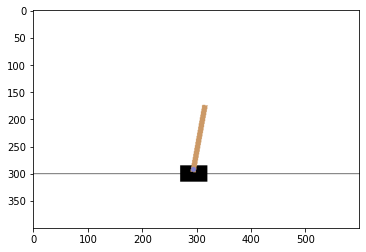

In [14]:
# See the screen shot of env
import matplotlib.pyplot as plt 
env_exhibit = env.render(mode = 'rgb_array')
env.close()
plt.imshow(env_exhibit)

## Explore 'ALE/Breakout-v5'

Overview for Breakout env:
The environment dynamics is to move the paddle and hit the ball in a brick wall. The goal is the destroy the brick wall.

In [21]:
# necessary libraries for import breakout-v4 env
import urllib.request
urllib.request.urlretrieve('http://www.atarimania.com/roms/Roms.rar','Roms.rar')
!pip install unrar
!unrar x Roms.rar
!mkdir rars
!mv HC\ ROMS.zip   rars
!mv ROMS.zip  rars
!python -m atari_py.import_roms rars


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from Roms.rar

Extracting  HC ROMS.zip                                                   36%  OK 
Extracting  ROMS.zip                                                      74% 99%  OK 
All OK
copying adventure.bin from ROMS/Adventure (1980) (Atari, Warren Robinett) (CX2613, CX2613P) (PAL).bin to /usr/local/lib/python3.7/dist-packages/atari_py/atari_roms/adventure.bin
copying air_raid.bin from ROMS/Air Raid (Men-A-Vision) (PAL) ~.bin to /usr/local/lib/python3.7/dist-packages/atari_py/atari_roms/air_raid.bin
copying alien.bin from ROMS/Alien (1982) (20th Century Fox Video Games, Douglas 'Dallas North' Neubauer) (11006) ~.bin to /usr/local/lib/python3.7/dist-packages/atari_py/atari_roms/alien.bin
copying amidar.bin from ROMS/Amidar (1982) (Parker Brothers, Ed Temple) (PB5310) ~.bin to /usr/local/lib/python3.7/dist-packages/atari_py/atari_roms/amidar.bin
copying assault.bin from ROMS/Assau

In [22]:
env = gym.make("Breakout-v4")

In [23]:
# Let's see the observation and action space of 'Breakout-v4' environment.
print('Observation space: ', env.observation_space)
print('Action space', env.action_space)

Observation space:  Box(0, 255, (210, 160, 3), uint8)
Action space Discrete(4)


In [24]:
# See the range of each observation space
print('Upper limit of observation: ', env.observation_space.high)
print('Lower limit of observation: ', env.observation_space.low)

Upper limit of observation:  [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
Lower limit of observation:  [[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ..

We see the observation space are RGB images. And we can train the RL model based on the pixels on each screen images. 
There are 4 possible actions, which indicate noop, fire, right, and left.



In [25]:
# Let's see the initial observation, reward by using funciton in the env
obs = env.reset()
# Select random action
action = env.action_space.sample()

obs_next, reward, done, info = env.step(action)
print('Next state:', obs_next)
print('Reward:', reward)
print('Complete situation: ', done)
print('Information: ', info)

Next state: [[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
Reward: 0.0
Complete situation:  False
Information:  {'ale.lives': 5}


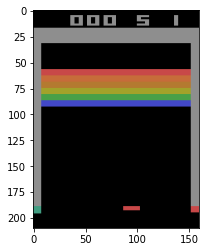

In [26]:
# See the screen shot of env
import matplotlib.pyplot as plt 
env_exhibit = env.render(mode = 'rgb_array')
env.close()
plt.imshow(env_exhibit)

Reference:

Rendering OpenAi Gym in Google Colaboratory, Paul Steven Conyngham, https://star-ai.github.io/Rendering-OpenAi-Gym-in-Colaboratory/

OpenAI Gym，Greg Brockman, etc., https://arxiv.org/pdf/1606.01540.